
# Load Data

In [17]:
import csv
import numpy
import scipy
from sklearn import linear_model
from math import sqrt
import matplotlib.pyplot as plt
training_list=[]
validate_list=[]
testdata_list=[]

tradata=csv.reader(open('/Users/wendy/Documents/2017 Fall/CS 534/homework1/BlogFeedback/blogData_train.csv'))
for row in tradata:
    training_list.append(row)
    
valdata=csv.reader(open('/Users/wendy/Documents/2017 Fall/CS 534/homework1/BlogFeedback/blogData_validate.csv'))
for row in valdata:
    validate_list.append(row)
    
testdata=csv.reader(open('/Users/wendy/Documents/2017 Fall/CS 534/homework1/BlogFeedback/blogData_test.csv'))
for row in testdata:
    testdata_list.append(row)
    
training_list=numpy.array(training_list,dtype=float)
validate_list=numpy.array(validate_list,dtype=float)
testdate_list=numpy.array(validate_list,dtype=float)

ytrain=training_list[:,280]
xtrain=training_list[:, 0:279]
yval=validate_list[:,280]
xval=validate_list[:,0:279]
xtest=testdate_list[:,0:279]
ytest=testdate_list[:,280]

# Normalization

In [37]:
import random

for i in range(len(training_list[0])):
    mu=numpy.average(training_list[:,i])
    sigma=numpy.std(training_list[:,i])
    for j in range(len(training_list)):
        if sigma!=0:
            training_list[j,i] = ( training_list[j,i] - mu) / sigma 

ytrain=training_list[:,280]
xtrain=training_list[:, 0:279]
    

# Implmentation of BLB

In [46]:
def BLB(b,s,r):
    data=[]
    All_w=[]
    for i in range(s):
        subsample=random.sample(training_list,b) 
        subsample_array=numpy.array(subsample)
        xsample=subsample_array[:, 0:279]
        ysample=subsample_array[:, 280]
        w=[]
        for k in range(r):
            bootstrapx=[]
            bootstrapy=[]
            for j in range(b):
                j=random.randint(0,b-1)
                bootx=xsample[j]
                booty=ysample[j]
                bootstrapx.append(bootx)
                bootstrapy.append(booty)
            linear=linear_model.LinearRegression()
            linear.fit(bootstrapx,bootstrapy)
            w.append(linear.coef_)
            k+=1
            
        All_w.append(w)
    return All_w

# Calculate True coefficient based on whole training data

In [183]:
linear_whole=linear_model.LinearRegression()
linear_whole.fit(xtrain,ytrain)
w_true=linear_whole.coef_


# b=n^0.7 andr=100. Plot the err rate as afunction of s<100

3.70772093896e+15 1
2.61991414838e+15 2
2.27366694126e+15 3
2.30474477303e+15 4
2.50032118724e+15 5
2.63152793404e+15 6
2.60632701465e+15 7
2.71380510149e+15 8
2.59695772802e+15 9
2.48697434391e+15 10
2.5690081391e+15 11
2.46807329147e+15 12
2.66871691979e+15 13
2.51470259847e+15 14
2.29262785764e+15 15
2.53953583758e+15 16
2.19304570991e+15 17
2.68931059934e+15 18
2.47464892182e+15 19
2.37233377939e+15 20
2.52600655812e+15 21
2.33326165832e+15 22
2.48121941892e+15 23
2.49100176681e+15 24
2.56958073003e+15 25
2.51378116471e+15 26
2.54180126674e+15 27
2.52729972371e+15 28
2.43222639198e+15 29
2.5219580168e+15 30
2.51611419855e+15 31
2.54958964672e+15 32
2.41187562344e+15 33
2.58893573181e+15 34
2.54284265449e+15 35
2.48620616786e+15 36
2.64344208839e+15 37
2.62145286635e+15 38
2.60769161769e+15 39
2.42696878828e+15 40
2.49623508608e+15 41
2.38550825859e+15 42
2.54284974286e+15 43
2.43229881851e+15 44
2.44077532307e+15 45
2.57774420024e+15 46
2.48615799403e+15 47
2.54048599524e+15 48
2.4

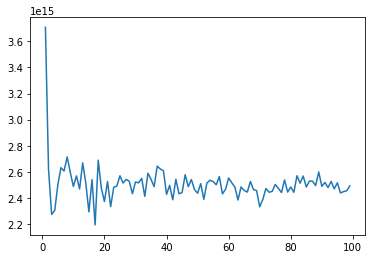

In [202]:
r=100
n=52397
b=n**0.7
w_estimate=BLB(int(b),5,r)
def err_for_subset(x):
    err=0
    for i in range(len(x[0])):
        for j in range(len(x)):
            err+=sum(abs(x[j][i]-w_true))
    return err
err_rate=[]
subset_num=[]
final_err=[]
previous_err=0
current_err=10**10
s=1
while s<100: #abs(current_err-previous_err)>=10**10:
    previous_err=current_err
    subset_num.append(s)
    w_estimate=BLB(int(b),s,r)
    current_err=err_for_subset(w_estimate)/s
    final_err.append(err_for_subset(w_estimate)/s)
    err_rate.append(numpy.mean(final_err))
    print current_err,s
    s+=1
    
plt.plot(subset_num,final_err)
plt.show()

 Based on the graph, the curv satrted to converge when s is around 90.

# Covert true coeffient from array to list

In [184]:
w_true=w_true.tolist()

# find the largest five coefficient in true W

In [185]:
import heapq
large_list= heapq.nlargest(5, w_true)
list_5=[]
for i in large_list:
    for j in range(len(w_true)):
        if w_true[j]==i:
            list_5.append((i,j))
print "5 top coefficient and their indexes is:",list_5

5 top coefficient and their indexes is: [(548738288865.90826, 59), (409819953724.3618, 57), (320350890164.3806, 37), (301677629165.64154, 17), (164836338020.19968, 27)]


# calculate the BLB coefficient for s equals to 90

In [ ]:
# r=100
n=52397
b=n**0.7
s=90
All_w=BLB(int(b),r,s)
        

# Function to find 95% confidence interval

In [189]:
def conf_in(k):
    coefficient=[]
    for i in range(len(All_w)):
        for j in range(len(All_w[0])):
            coefficient.append(All_w[i][j][list_5[k][1]])
    diff_list=[]
    for i in coefficient:
        diff_list.append(abs(i-list_5[k][0]))
    ordered_diff_list=sorted(diff_list)
    total_num=len(sorted(diff_list))
    up_index= int(total_num*0.95)
    down_index=int(total_num*0.05)
    #print ordered_diff_list[down_index],ordered_diff_list[up_index]
    conffidence_interval=[list_5[k][0]-ordered_diff_list[down_index],list_5[k][0]+ordered_diff_list[up_index]]
    return conffidence_interval


# calculate the confidence interval for 5 largest coefficients

In [190]:
conffidence_interval=[]
for i in range(0,5):
    print "conffidence interval for", i+1 ,"coefficient is:", conf_in(i)

conffidence interval for 1 coefficient is: [440985539377.90405, 2510395060793.4531]
conffidence interval for 2 coefficient is: [329345841192.43768, 1874864591225.2776]
conffidence interval for 3 coefficient is: [250870492285.7077, 2718153437385.4766]
conffidence interval for 4 coefficient is: [231120509672.72357, 3155397416525.6777]
conffidence interval for 5 coefficient is: [118874077148.32458, 2455901885306.3066]
